#Desafio: Clustering com o Wine Dataset
#Dataset

#Wine Dataset (scikit-learn)

- Descrição: Cada vinho possui 13 características químicas (ex: álcool, acidez, cinzas, magnésio, fenóis, etc.)

- Classes reais: 3 tipos de vinho (usadas apenas para comparação, não para treinar o cluster)

In [52]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1️⃣ Carregar e explorar os dados

- Use load_wine() do scikit-learn.

- Transforme os dados em um DataFrame para visualização.

- Observe o número de amostras, features e classes.

In [53]:
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

# Adicionar coluna com os nomes das classes (para facilitar visualização)
wine_df['Classe'] = wine_df['target'].apply(lambda x: wine_data.target_names[x])

# Mostrar as primeiras 10 linhas em uma tabela organizada
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("Tabela das primeiras 10 amostras do Wine Dataset:")
display(wine_df.head(10))

Tabela das primeiras 10 amostras do Wine Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Classe
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,class_0


#2️⃣ Normalizar os dados

- O K-Means é sensível à escala.

- Utilize uma técnica de normalização ou padronização (ex: StandardScaler) para que todas as features fiquem na mesma escala.

In [54]:
# Separar apenas as features (sem target e Classe)
features = wine_df.drop(columns=['target', 'Classe'])

# Criar o padronizador
scaler = StandardScaler()

# Normalizar as features
features_normalizadas = scaler.fit_transform(features)

# Transformar em DataFrame organizado
df_normalizado = pd.DataFrame(features_normalizadas, columns=features.columns)

# Mostrar as primeiras 10 linhas normalizadas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("Tabela das primeiras 10 amostras normalizadas:")
display(df_normalizado.head(10))

Tabela das primeiras 10 amostras normalizadas:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


#3️⃣Aplicar K-Means

- Escolha inicialmente k = 3 (porque existem 3 classes de vinho).

- Treine o modelo usando apenas as features, sem os rótulos.

- Obtenha os clusters atribuídos pelo K-Means.


In [55]:
# Número de clusters (igual ao número de classes reais)
k = 3

# Criar o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Treinar o modelo usando apenas as features normalizadas
kmeans.fit(df_normalizado)

# Obter os clusters atribuídos a cada amostra
df_normalizado['Cluster'] = kmeans.labels_

# Mostrar as primeiras 10 linhas com os clusters
print("Tabela das primeiras 10 amostras com os clusters atribuídos:")
display(df_normalizado.head(10))

# Opcional: mostrar os centros de cada cluster
centros = pd.DataFrame(kmeans.cluster_centers_, columns=df_normalizado.columns[:-1])
print("\nCentros dos clusters:")
display(centros)

Tabela das primeiras 10 amostras com os clusters atribuídos:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,2
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,2
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,2
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,2
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,2



Centros dos clusters:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


#4️⃣ Comparar clusters com classes reais

- Utilize uma métrica para comparar os clusters com os rótulos originais (ex: Adjusted Rand Index, ou criar uma tabela de contagem cruzada).

- Analise se os clusters correspondem bem às classes reais de vinho.

In [56]:
# Adicionar a coluna das classes reais no DataFrame normalizado
df_normalizado['Classe_Real'] = wine_df['Classe']

# Criar tabela de contagem cruzada entre clusters e classes reais
tabela_crosstab = pd.crosstab(df_normalizado['Cluster'], df_normalizado['Classe_Real'])
print("Tabela de contagem cruzada entre clusters e classes reais:")
display(tabela_crosstab)

# Calcular o Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df_normalizado['Classe_Real'], df_normalizado['Cluster'])
print(f"\nAdjusted Rand Index (ARI) entre clusters e classes reais: {ari:.2f}")

Tabela de contagem cruzada entre clusters e classes reais:


Classe_Real,class_0,class_1,class_2
Cluster,,,
0,0,65,0
1,0,3,48
2,59,3,0



Adjusted Rand Index (ARI) entre clusters e classes reais: 0.90



# 5️⃣ Visualizar clusters

- Use redução de dimensionalidade (ex: PCA) para transformar as 13 features em 2 dimensões.

- Crie um gráfico de dispersão mostrando:

Pontos coloridos pelos clusters do K-Means

Opcional: formas ou bordas diferentes para indicar as classes reais

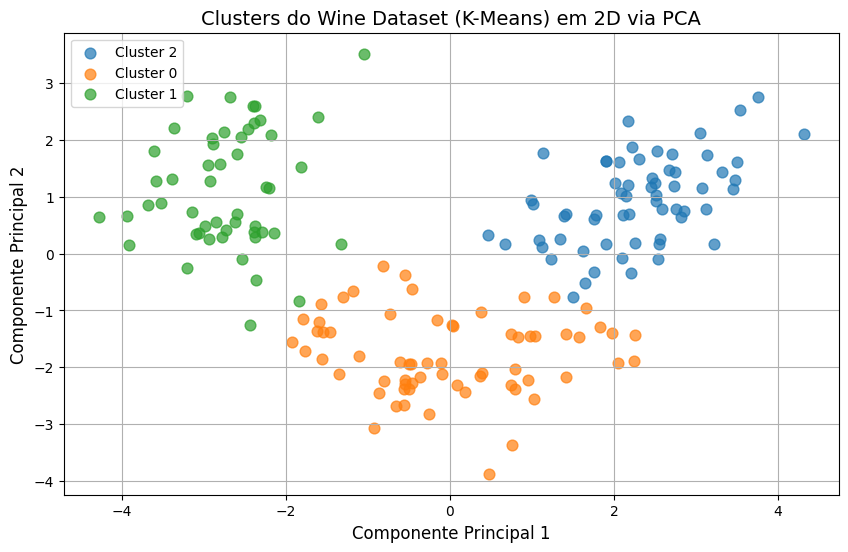

In [57]:
# Reduzir as 13 features para 2 componentes principais
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(df_normalizado.drop(columns=['Cluster', 'Classe_Real']))

# Criar DataFrame com as componentes principais
df_pca = pd.DataFrame(data=componentes_principais, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_normalizado['Cluster']
df_pca['Classe_Real'] = df_normalizado['Classe_Real']

# Gráfico de dispersão
plt.figure(figsize=(10,6))
cores = ['red', 'green', 'blue']

for cluster in df_pca['Cluster'].unique():
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'],
                label=f'Cluster {cluster}',
                s=60, alpha=0.7)

plt.title('Clusters do Wine Dataset (K-Means) em 2D via PCA', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#6️⃣ Explorar diferentes números de clusters (k)

- Teste valores como 2, 3, 4, 5.

- Observe como os clusters mudam com cada k.

- Reflita: qual valor de k parece mais adequado para os vinhos?

Adjusted Rand Index (ARI): 0.37


Classe_Real,class_0,class_1,class_2
Cluster,,,
0,59,48,0
1,0,23,48


Adjusted Rand Index (ARI): 0.90


Classe_Real,class_0,class_1,class_2
Cluster,,,
0,0,65,0
1,0,3,48
2,59,3,0


Adjusted Rand Index (ARI): 0.82


Classe_Real,class_0,class_1,class_2
Cluster,,,
0,3,8,0
1,0,3,48
2,56,2,0
3,0,58,0


Adjusted Rand Index (ARI): 0.63


Classe_Real,class_0,class_1,class_2
Cluster,,,
0,3,24,0
1,0,1,48
2,21,3,0
3,0,43,0
4,35,0,0


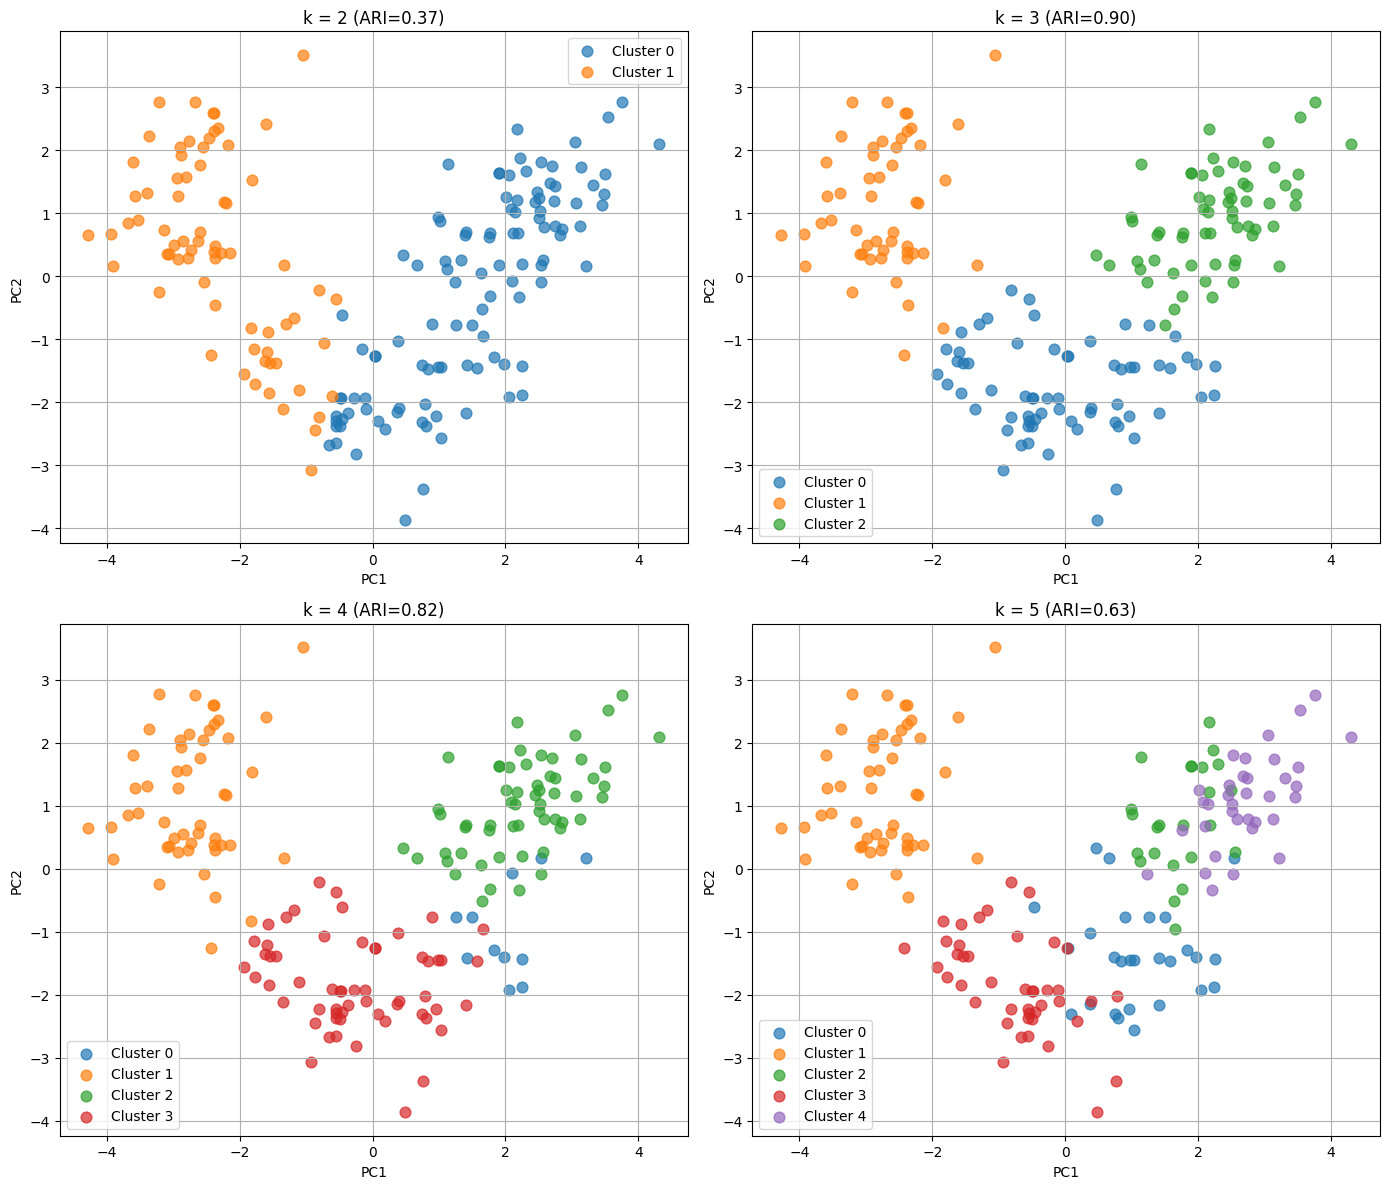

In [62]:
# Valores de k para testar
valores_k = [2, 3, 4, 5]

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, k in enumerate(valores_k):
    # Treinar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_normalizado.drop(columns=['Cluster', 'Classe_Real']))
    df_pca['Cluster'] = clusters

    # Calcular ARI
    ari = adjusted_rand_score(df_pca['Classe_Real'], df_pca['Cluster'])

    # Criar tabela cruzada (opcional, pode mostrar no print)
    tabela_crosstab = pd.crosstab(df_pca['Cluster'], df_pca['Classe_Real'])
    print(f"Adjusted Rand Index (ARI): {ari:.2f}")
    display(tabela_crosstab)

    # Gráfico de dispersão no subplot correspondente
    ax = axes[i]
    cores = plt.cm.tab10.colors
    for cluster in range(k):
        subset = df_pca[df_pca['Cluster'] == cluster]
        ax.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', s=60, alpha=0.7)

    ax.set_title(f'k = {k} (ARI={ari:.2f})', fontsize=12)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

#7️⃣ Conclusão

- Escreva um resumo sobre:

- Quão bem os clusters refletem as classes reais

- Qual número de clusters parece mais apropriado

- Limitações do K-Means para esse dataset (por exemplo, sensibilidade à escala, clusters de tamanhos diferentes, etc.)

# Conclusão

- **Quão bem os clusters refletem as classes reais:**  
  Observando as tabelas de contagem cruzada e o **Adjusted Rand Index (ARI)**:  
  - `k=2` → ARI = 0.37: os clusters misturam bastante as classes reais; a correspondência é fraca.  
  - `k=3` → ARI = 0.90: excelente correspondência com as classes reais; cada cluster representa bem uma das classes.  
  - `k=4` → ARI = 0.82: alguns clusters começam a dividir classes que deveriam estar juntas; ainda bom, mas menos claro que k=3.  
  - `k=5` → ARI = 0.63: clusters misturam classes novamente; a correspondência diminui.

- **Qual número de clusters parece mais apropriado:**  
  Para este dataset, **k=3** é o valor mais adequado, pois coincide com o número de classes reais e apresenta o ARI mais alto (0.90).

- **Limitações do K-Means para esse dataset:**  
  - Sensível à **escala** das features → normalização é obrigatória.  
  - Assume clusters **esféricos e de tamanhos similares**, o que nem sempre corresponde à realidade.  
  - Pode ser afetado por **outliers**, distorcendo a posição dos centros.  
  - Escolha incorreta de k pode gerar clusters que não refletem a estrutura real dos dados.
